<a href="https://colab.research.google.com/github/wk-bootdee/Demi-project-ML/blob/main/Copy_of_Demi_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruction

# **Project: Image Classification for Beginners**

For our upcoming machine learning project, we’ll be delving into image classification, a fascinating application of machine learning. In this project, we’ll explore how to build an image classification model from scratch, allowing you the flexibility to choose the best model for the task.

__Problem Statement__
    
Our goal is to develop a machine learning model to classify images into different categories. This project will challenge us to leverage our knowledge of machine learning techniques to build a robust image classifier.

__Dataset__
    
You can choose any of the following popular image datasets like CIFAR-10, CIFAR100, MNIST, or Fashion-MNIST. Alternatively, we can curate a custom dataset relevant to a specific domain or application.

-------------------

## 1. Project Task 1: Data Exploration

Let’s start by exploring the image dataset to understand its structure, image dimensions, and the number of classes/categories. (3 marks)

In [ ]:
%pip install tensorflow

## 1.1 Import Libraries
- All essential libraries are imported in this step.
- For better performance, Please run this notebook on Google Colab.

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## 1.2 Understand the Image Dataset

CIFAR-10 dataset contains 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the CIFAR homepage.

The classes in the dataset are:
<table>
<thead>
<tr>
<th style="text-align: center">Label</th>
<th>Description</th>
</tr>
</thead>

<tbody>
<tr>
<td style="text-align: center">0</td>
<td>airplane</td>
</tr>
<tr>
<td style="text-align: center">1</td>
<td>automobile</td>
</tr>
<tr>
<td style="text-align: center">2</td>
<td>bird</td>
</tr>
<tr>
<td style="text-align: center">3</td>
<td>cat</td>
</tr>
<tr>
<td style="text-align: center">4</td>
<td>deer</td>
</tr>
<tr>
<td style="text-align: center">5</td>
<td>dog</td>
</tr>
<tr>
<td style="text-align: center">6</td>
<td>frog</td>
</tr>
<tr>
<td style="text-align: center">7</td>
<td>horse</td>
</tr>
<tr>
<td style="text-align: center">8</td>
<td>ship</td>
</tr>
<tr>
<td style="text-align: center">9</td>
<td>truck</td>
</tr>
</tbody>
</table>

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. These classes include everyday objects such as airplanes, automobiles, birds, and cats.
Classifying CIFAR-10 images using a plot circle would be pretty challenging because:

1. **Complexity of the Data:** CIFAR-10 images are 32x32 with three colour channels (red, green, and blue). A plot circle typically operates on numerical data or simple geometric shapes, whereas processing image data requires more sophisticated techniques such as convolutional neural networks (CNNs).

2. **High Dimensionality:** Each CIFAR-10 image has 32x32x3 = 3072 features (pixels), making the data high-dimensional. Plotting such high-dimensional data directly on a 2D plot (like a circle) is not feasible.

3. **Non-Linearity and Variability:** The relationships between the features in CIFAR-10 images are highly non-linear and complex. Plotting them on a circle would not capture the intricate patterns needed for classification.

To classify CIFAR-10 images effectively, advanced techniques such as deep learning, specifically convolutional neural networks (CNNs), are typically used. CNNs can automatically learn hierarchical features from raw image data, making them well-suited for classification tasks like CIFAR-10. These models can handle the complexity, high dimensionality, and non-linearity of the CIFAR-10 dataset, achieving high accuracy in classification tasks.

In [4]:
# Total classes in CIFAR-10 dataset
classes = np.unique(y_train)
nClasses = len(classes)
print("Total number of outputs : ", nClasses)
print("Output classes : ", classes)

# Check data dimension
print("X_train data shape is", x_train.shape)
print("y_train data shape is", y_train.shape)
print("X_test data shape is", x_test.shape)
print("y_test data shape is", y_test.shape)

# Check data type
print("X_train data type is", x_train.dtype)
print("y_train data type is", y_train.dtype)
print("X_test data type is", x_test.dtype)
print("y_test data type is", y_test.dtype)


%pip install prettytable
# print dimensions of the dataset and data type of the dataset as a Table by using PrettyTable
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Data", "Shape", "Data Type"]
x.add_row(["X_train", x_train.shape, x_train.dtype])
x.add_row(["y_train", y_train.shape, y_train.dtype])
x.add_row(["X_test", x_test.shape, x_test.dtype])
x.add_row(["y_test", y_test.shape, y_test.dtype])
print(x)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
X_train data shape is (50000, 32, 32, 3)
y_train data shape is (50000, 1)
X_test data shape is (10000, 32, 32, 3)
y_test data shape is (10000, 1)
X_train data type is uint8
y_train data type is uint8
X_test data type is uint8
y_test data type is uint8


Note: you may need to restart the kernel to use updated packages.
+---------+--------------------+-----------+
|   Data  |       Shape        | Data Type |
+---------+--------------------+-----------+
| X_train | (50000, 32, 32, 3) |   uint8   |
| y_train |     (50000, 1)     |   uint8   |
|  X_test | (10000, 32, 32, 3) |   uint8   |
|  y_test |     (10000, 1)     |   uint8   |
+---------+--------------------+-----------+


Display several images from the dataset to understand the image quality and the content of the images.

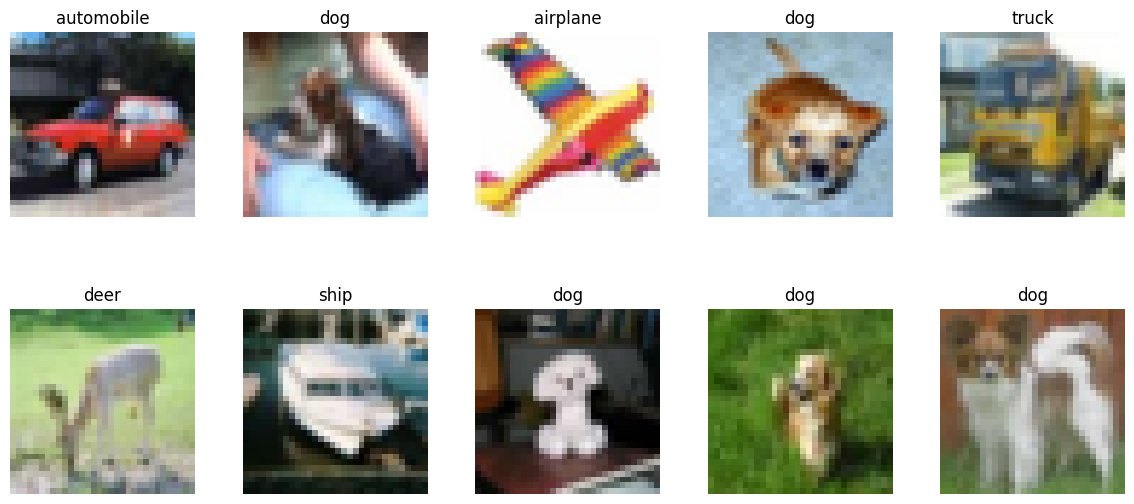

In [5]:
# Pick a random image from the dataset
import matplotlib.pyplot as plt
import numpy as np

# Define the text labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plot random first few images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace = 0.5, wspace=.001)
ax = ax.ravel()
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0])
    ax[i].imshow(x_train[idx])
    ax[i].set_title(cifar10_labels[y_train[idx][0]])
    ax[i].axis('off')
plt.show()

---

## 1.3 Data Preparation

### **1.3.1 Image Normalization**
- Normalize the images to a pixel value between 0 and 1.
- Normalizing the images will make the model train faster. Because the model has to deal with smaller values.

In [6]:
# Image normalization for CIFAR-10 dataset and prepare the data for training the CNN model.
# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

---------------

### **1.3.2 Coverting Labels to Categorical**
- Convert the labels into a set of 10 numbers to input into the neural network.
- For example, the label 3 will be represented as 0 0 0 1 0 0 0 0 0 0.
- This is done to avoid the model misinterpreting the labels as being in some kind of order and help the model understand that the labels are categorical.

In [7]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, nClasses)
y_test = keras.utils.to_categorical(y_test, nClasses)

----

## Project Task2: Model Selection

__Question__

Now comes the exciting part – choosing the best model for image classification! You have the freedom to experiment with various machine learning and deep learning models, including but not limited to Support Vector Machines (SVMs), Decision Trees, Random Forests, Convolutional Neural Networks (CNNs), and more. (5 marks)


__Answer__
<u>I have choosen VGG. The reason explained below.</u>

VGG stands for Visual Geometry Group; it is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers. The “deep” refers to the number of layers with VGG-16 or VGG-19 consisting of 16 and 19 convolutional layers. The VGG architecture is the basis of ground-breaking object recognition models. Developed as a deep neural network, the VGGNet also surpasses baselines on many tasks and datasets beyond ImageNet. Moreover, it is now still one of the most popular image recognition architectures. Therefore, VGG might be best with my Model.

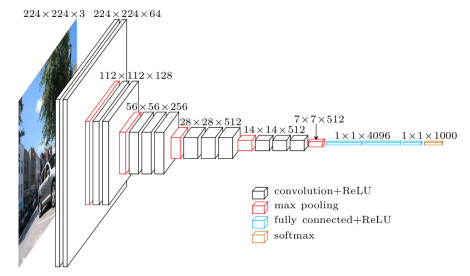



---

### **2.1 Setup Model VGG3**


In [ ]:
# setup model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(nClasses, activation='softmax'))

Display model summary.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

---

### **2.2 Compile the Model**

In [ ]:
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### **2.3 Fit model**
- Train the model on the training data. For faster training on the Google Colab, please use the GPU runtime.
- Store the training history in a variable name `history`.

In [ ]:
EPOCHS = 100
BATCH_SIZE = 64

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/100
782/782 [==============================] - 9s 6ms/step - loss: 1.8436 - accuracy: 0.3407 - val_loss: 1.9236 - val_accuracy: 0.3377
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 1.4582 - accuracy: 0.4795 - val_loss: 1.3867 - val_accuracy: 0.4965
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 1.2826 - accuracy: 0.5411 - val_loss: 1.3551 - val_accuracy: 0.5202
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 1.1528 - accuracy: 0.5907 - val_loss: 1.1810 - val_accuracy: 0.5837
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 1.0430 - accuracy: 0.6327 - val_loss: 1.0779 - val_accuracy: 0.6226
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 0.9625 - accuracy: 0.6631 - val_loss: 1.1481 - val_accuracy: 0.5980
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 0.8859 - accuracy: 0.6894 - val_loss: 1.1897 - val_accuracy: 0.5943

### **2.4 Summarize Learning Curve**

In [9]:
def summarize_diagnostics(history):
 # plot loss
 plt.subplot(211)
 plt.title('Cross Entropy Loss')
 plt.plot(history.history['loss'], color='blue', label='train')
 plt.plot(history.history['val_loss'], color='orange', label='test')
 # plot accuracy
 plt.subplot(212)
 plt.title('Classification Accuracy')
 plt.plot(history.history['accuracy'], color='blue', label='train')
 plt.plot(history.history['val_accuracy'], color='orange', label='test')

Plot the accuracy of training and validation sets over epochs

> 72.680


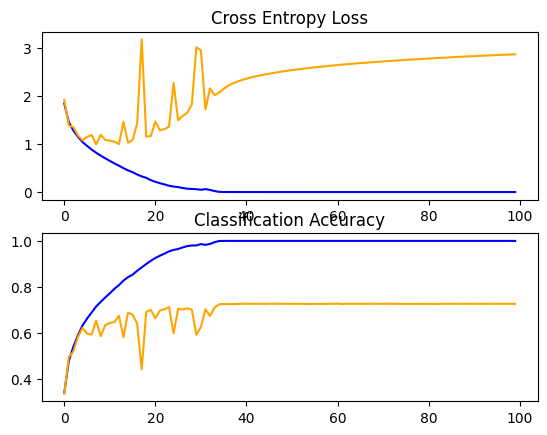

In [ ]:
 _, acc = model.evaluate(x_test, y_test, verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)

### Conclusion for the based Model.

The Learning Curve graph shows it started overfitting approximately 15 -18 epochs. Then, the Test Loss began to increase. So, This Model is definitely overfitting.

-----------

### ResNet50V2 Model.

In [10]:
# Generate ResNet50V2 model.
from tensorflow.keras.applications import ResNet50V2

EPOCHS = 100
BATCH_SIZE = 64

# Load the ResNet50V2 model
model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers
for layer in model.layers:
    layer.trainable = False

# Add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(nClasses, activation='softmax')(class1)

# Define the model
model = keras.Model(inputs=model.inputs, outputs=output)

# Compile the model
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

summarize_diagnostics(history)

Epoch 1/100


2024-04-16 04:49:13.170923: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


357/782 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.1481 - loss: 2.2699

KeyboardInterrupt: 

---

## Project Task 3: Model Evaluation

__Question__

Evaluate the trained model’s performance on a separate validation set and fine-tune its hyperparameters to optimize performance further. (3 marks)


__Answer__

<u>I have chosen The Regularization Techniques</u>

There are many regularization techniques I could try, however, I have perform 3 techniques. They are Early Stopping, Dropout Regularization, Batch Normalization, and Data Aungmention. Those techniques were performed to develop model performance.


### **3.1 Early Stopping**

Early stopping prevents overfitting and improves generalization performance in machine learning. During training, the model's performance is monitored on a validation set. If the performance stops improving, training is stopped early. The best model parameters are selected for making predictions on new data.

In [ ]:
# Define early stopping callback when overfitting occurs.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode="min")

---

### **3.2 Dropout Regularization**

Dropout is a simple technique that will randomly drop nodes out of the network. It has a regularizing effect as the remaining nodes must adapt to pick-up the slack of the removed nodes.

A Gentle Introduction to Dropout for Regularizing Deep Neural Networks
Dropout can be added to the model by adding new Dropout layers, where the amount of nodes removed is specified as a parameter. There are many patterns for adding Dropout to a model, in terms of where in the model to add the layers and how much dropout to use.

In this case, I will add Dropout layers after each max pooling layer and after the fully connected layer, and use a fixed dropout rate of 20% (e.g. retain 80% of the nodes).

The updated VGG 3 baseline model with dropout is listed below.

In [ ]:
# define cnn model
def define_dropout_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model summary

In [ ]:
model = define_dropout_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

Then, Train Model after adding Dropout.

In [ ]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])

Epoch 1/100
782/782 [==============================] - 8s 6ms/step - loss: 2.1824 - accuracy: 0.1808 - val_loss: 2.0198 - val_accuracy: 0.2748
Epoch 2/100
782/782 [==============================] - 4s 5ms/step - loss: 1.8290 - accuracy: 0.3329 - val_loss: 1.5933 - val_accuracy: 0.4301
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 1.6244 - accuracy: 0.4062 - val_loss: 1.5058 - val_accuracy: 0.4682
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 1.5158 - accuracy: 0.4466 - val_loss: 1.4494 - val_accuracy: 0.4798
Epoch 5/100
782/782 [==============================] - 4s 5ms/step - loss: 1.4378 - accuracy: 0.4770 - val_loss: 1.3562 - val_accuracy: 0.5058
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 1.3758 - accuracy: 0.5014 - val_loss: 1.2620 - val_accuracy: 0.5473
Epoch 7/100
782/782 [==============================] - 4s 5ms/step - loss: 1.3177 - accuracy: 0.5248 - val_loss: 1.2397 - val_accuracy: 0.5527

Evaluate

> 80.930


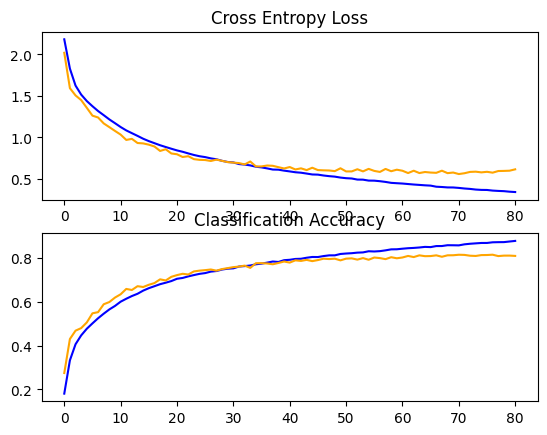

In [ ]:
 _, acc = model.evaluate(x_test, y_test, verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)

The model reached early stopping after 86 epochs, but there is room for improvement by increasing the learning time.

-----

### **3.3 Incresing Dropout and Batch Normalization**

Constant Dropout for 20% of testing is working pretty good. So it may be worth investigating variations of how dropout is applied to the model.

One variation that might be interesting is to increase the amount of dropout from 20% to 25% or 30%. Another variation that might be interesting is using a pattern of increasing dropout from 20% for the first block, 30% for the second block, and so on to 50% at the fully connected layer in the classifier part of the model.

This type of increasing dropout with the depth of the model is a common pattern. It is effective as it forces layers deep in the model to regularize more than layers closer to the input.

On the other hand, The Batch normalization involves normalizing the activations of each layer to improve the training speed and stability. It is a simple but effective technique that can be used on the inputs to the layer before or after the activation function in the model.

These are layer of improving into the Model.

In [ ]:
# Batch Normalization
def define_model_drop_n_batch():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model Summary

In [ ]:
model = define_model_drop_n_batch()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_21 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_22 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

Train and Evaluate Model

In [ ]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping])

Epoch 1/100
782/782 [==============================] - 9s 8ms/step - loss: 2.0532 - accuracy: 0.3228 - val_loss: 1.4759 - val_accuracy: 0.4579
Epoch 2/100
782/782 [==============================] - 6s 7ms/step - loss: 1.5277 - accuracy: 0.4447 - val_loss: 1.4848 - val_accuracy: 0.4565
Epoch 3/100
782/782 [==============================] - 6s 7ms/step - loss: 1.3813 - accuracy: 0.4999 - val_loss: 1.2914 - val_accuracy: 0.5212
Epoch 4/100
782/782 [==============================] - 6s 7ms/step - loss: 1.2867 - accuracy: 0.5360 - val_loss: 1.2724 - val_accuracy: 0.5351
Epoch 5/100
782/782 [==============================] - 6s 7ms/step - loss: 1.2176 - accuracy: 0.5618 - val_loss: 1.1765 - val_accuracy: 0.5684
Epoch 6/100
782/782 [==============================] - 6s 7ms/step - loss: 1.1664 - accuracy: 0.5811 - val_loss: 1.2840 - val_accuracy: 0.5383
Epoch 7/100
782/782 [==============================] - 6s 7ms/step - loss: 1.1257 - accuracy: 0.5986 - val_loss: 1.2810 - val_accuracy: 0.5449

Evaluate Model

> 84.320


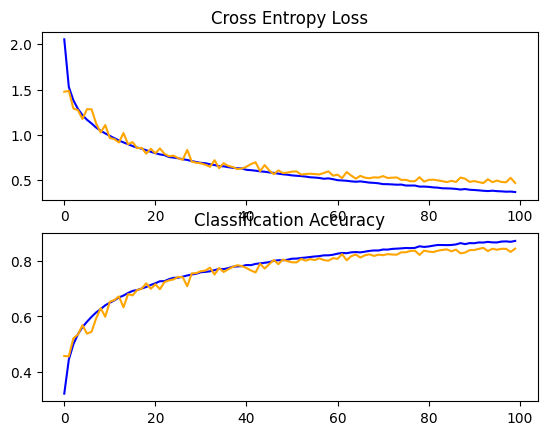

In [ ]:
 _, acc = model.evaluate(x_test, y_test, verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)

The Early stopping will be triggered after 90 epochs.Whereas, The gap between training and validation loss is small, indicating that the model is still improving.

---

### **3.4 Incresing Dropout, Batch Normalization, and Data Augmentation**



The previous example can be improved in several ways.

First, It can be increased the number of training epochs from 200 to 400, which will give the model more chances to improve.

Second, It can be added batch normalization to stabilize the learning and potentially speed up the learning process. To offset this acceleration, It can be increased the regularization by changing the dropout pattern from fixed to increasing. The updated model definition can be found below.

Defined the previous model configurations.

In [ ]:
model = define_model_drop_n_batch()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_14 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_15 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

Defined the Data Augmention using ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

Train Model

Because the Data Augmentation generates a lot of datasets, such as Flipped, The model will require more time to train itself. Therefore, I extend the EPOCHS from 100 times to 400 times.

In [ ]:
# fit model
epochs = EPOCHS + 300
steps = int(x_train.shape[0] / BATCH_SIZE)
history = model.fit(it_train, steps_per_epoch=steps, epochs=EPOCHS + 300, validation_data=(x_test, y_test), batch_size=BATCH_SIZE, callbacks=[early_stopping])

Epoch 1/400
781/781 [==============================] - 27s 32ms/step - loss: 2.1619 - accuracy: 0.2936 - val_loss: 1.5327 - val_accuracy: 0.4509
Epoch 2/400
781/781 [==============================] - 24s 31ms/step - loss: 1.6299 - accuracy: 0.4073 - val_loss: 1.4244 - val_accuracy: 0.4740
Epoch 3/400
781/781 [==============================] - 24s 31ms/step - loss: 1.4960 - accuracy: 0.4512 - val_loss: 1.3901 - val_accuracy: 0.4958
Epoch 4/400
781/781 [==============================] - 24s 31ms/step - loss: 1.4165 - accuracy: 0.4815 - val_loss: 1.4112 - val_accuracy: 0.4841
Epoch 5/400
781/781 [==============================] - 24s 31ms/step - loss: 1.3526 - accuracy: 0.5099 - val_loss: 1.3030 - val_accuracy: 0.5208
Epoch 6/400
781/781 [==============================] - 24s 31ms/step - loss: 1.2987 - accuracy: 0.5330 - val_loss: 1.4107 - val_accuracy: 0.4932
Epoch 7/400
781/781 [==============================] - 24s 31ms/step - loss: 1.2552 - accuracy: 0.5468 - val_loss: 1.3520 - val_ac

Evaluate Model

> 85.960


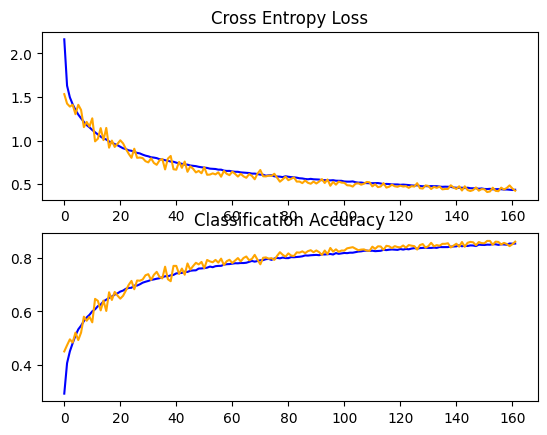

In [ ]:
 _, acc = model.evaluate(x_test, y_test, verbose=0)
 print('> %.3f' % (acc * 100.0))
 # learning curves
 summarize_diagnostics(history)

## Conclusion

In this assignment, I executed a series of steps to enhance the performance of our machine learning model. Initially, I imported the necessary libraries and prepared the data by normalizing the features and converting labels into categorical format. Following data preparation, I selected the VGG3 model as the primary framework for training. During the initial model fitting, I encountered overfitting issues; to address these, I implemented early stopping, dropout regularization, increased the dropout rate, and incorporated batch normalization along with data augmentation. These modifications significantly improved the model's accuracy.

Here are the results I obtained:

- **Baseline Model:** 72.680%
- **Dropout:** 80.930%
- **Increasing Dropout + Batch Normalization:** 84.320%
- **Increasing Dropout + Data Augmentation + Batch Normalization:** 85.960%

In conclusion, this project not only reinforced my understanding of practical machine learning concepts but also highlighted the importance of model tuning and regularization techniques in combating overfitting. By methodically adjusting the model parameters and augmenting the data, I was able to optimize our model's performance, demonstrating the critical role of iterative testing and modifications in achieving enhanced machine learning outcomes. This experience has been invaluable in honing my skills in model selection, data preprocessing, and the strategic application of various regularization techniques to ensure robust model performance.